# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [176]:
# Import your libraries:
#Import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(context="notebook", style="darkgrid")

from sklearn.cluster import KMeans

%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [177]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [178]:
customers.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [179]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [180]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [181]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

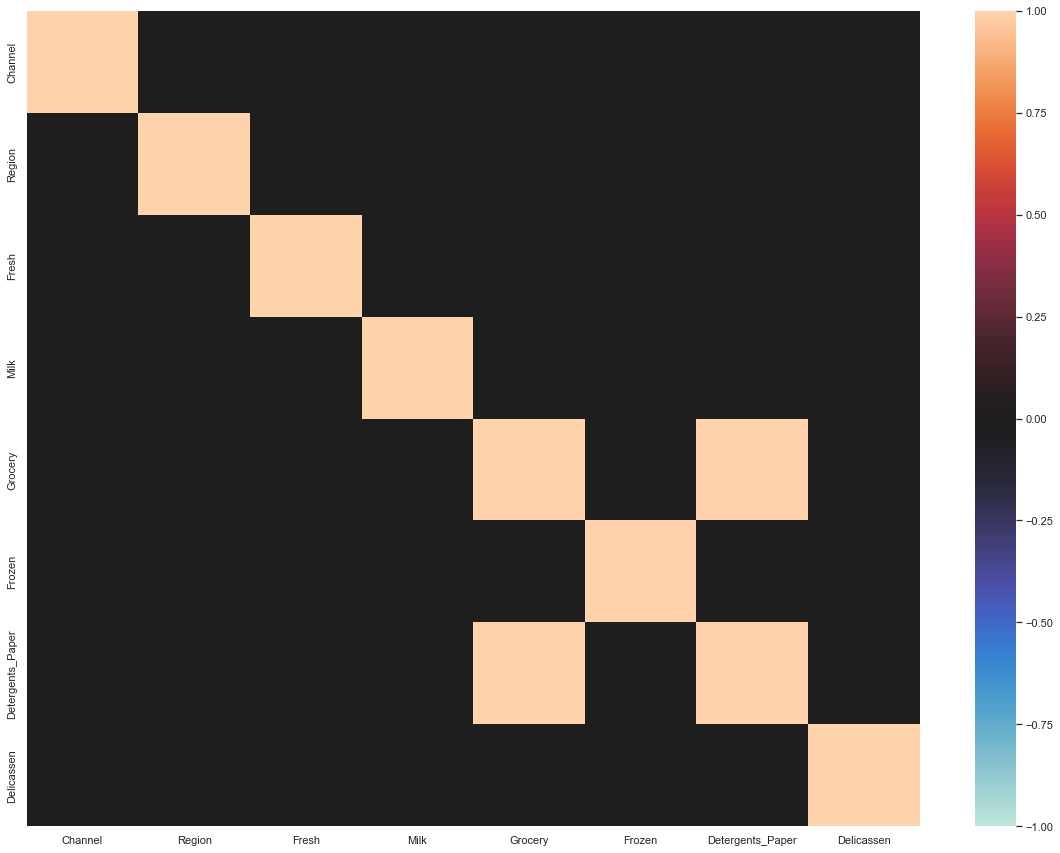

In [182]:
# Your code here:
plt.figure(figsize=(20,15))
sns.heatmap(customers.corr()>.8, vmin = -1, vmax = 1, center = 0)

In [183]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


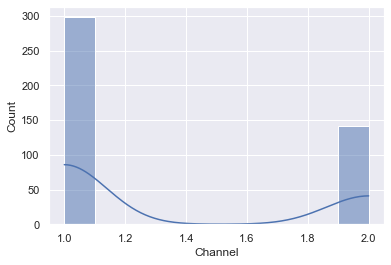

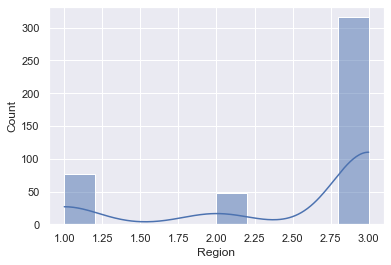

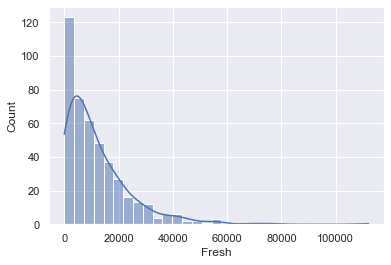

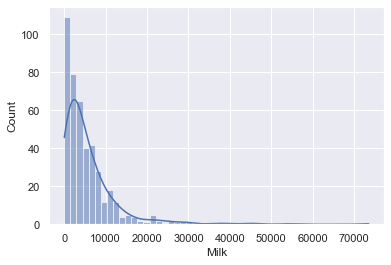

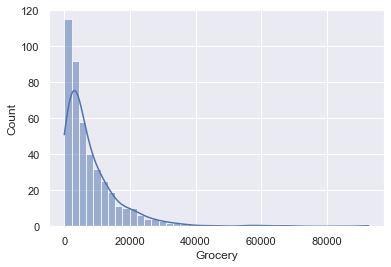

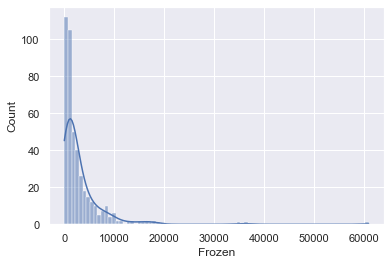

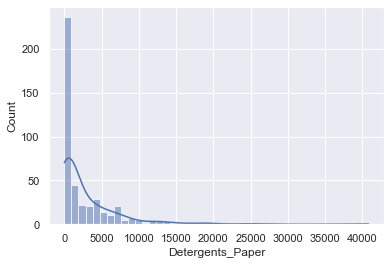

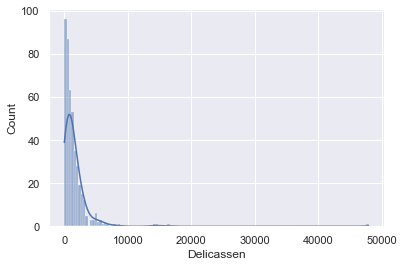

In [184]:
for col in customers:
    plt.figure(figsize=(6,4))
    sns.histplot(data=customers,x=col,kde=True)
    plt.show

I cannot tell whether Pareto principle is presemt in this data base. 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [185]:
# Your code here
for col in customers:
    q25 = np.quantile(customers[col], 0.25)
    q75 = np.quantile(customers[col], 0.75)
    IQR = q75 - q25
    mask = (customers[col] > (q75 + 3 * IQR)) | (customers[col] < (q25 - 3 * IQR))
    out_customers = customers[mask]
out_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
23,2,3,26373,36423,22019,5154,4337,16523
47,2,3,44466,54259,55571,7782,24171,6465
71,1,3,18291,1266,21042,5373,4173,14472
87,1,3,43265,5025,8117,6312,1579,14351
171,2,3,200,25862,19816,651,8773,6250
181,1,3,112151,29627,18148,16745,4948,8550
183,1,3,36847,43950,20170,36534,239,47943
202,1,1,25203,11487,9490,5065,284,6854
218,2,1,18,7504,15205,1285,4797,6372


In [186]:
customers=customers[~mask]
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125



We gone wait!

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [187]:
# Your import here:

from sklearn.preprocessing import StandardScaler



In [188]:
customers_scaler = StandardScaler()
customers_scaler.fit(customers)
customers_scale=pd.DataFrame(customers_scaler.transform(customers),columns=customers.columns)
customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.462425,0.592898,0.097337,0.655052,-0.012634,-0.596709,-0.030350,0.081700
1,1.462425,0.592898,-0.391300,0.678808,0.205122,-0.257900,0.101606,0.466184
2,-0.683796,0.592898,0.149231,-0.650005,-0.375017,0.758087,-0.492302,0.476718
3,1.462425,0.592898,0.963337,0.000055,-0.052019,0.213323,-0.221569,3.458663
4,1.462425,0.592898,-0.186163,0.439548,-0.276827,-0.497780,-0.217732,0.180894
...,...,...,...,...,...,...,...,...
425,-0.683796,0.592898,1.580489,1.024510,0.905911,2.231291,-0.561584,0.841890
426,-0.683796,0.592898,2.409832,-0.613753,-0.750095,0.343550,-0.580557,0.966540
427,1.462425,0.592898,0.259462,1.554708,2.448320,-0.547901,2.563360,0.546066
428,-0.683796,0.592898,-0.109802,-0.528909,-0.590820,-0.416361,-0.564569,0.772542


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

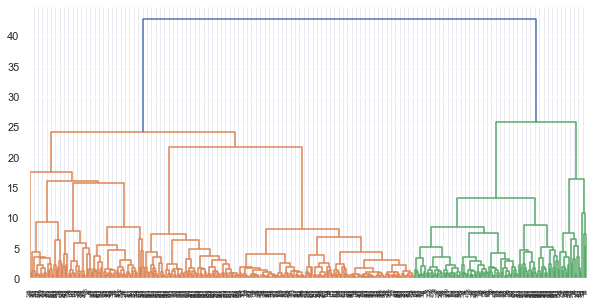

In [189]:
# Your code here:
from scipy.cluster.hierarchy import dendrogram, linkage
fig = plt.figure(figsize = (10, 5))
link = linkage(customers_scale, method = 'ward')
customers_dendogram = dendrogram(link)

In [190]:
km_fit = KMeans(n_clusters=5)
km_fit.fit(customers_scale)

KMeans(n_clusters=5)

In [214]:
customers['labels']=[str(x) for x in km_fit.labels_]

In [215]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
3,1,3,13265,1196,4221,6404,507,1788,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1
5,2,3,9413,8259,5126,666,1795,1451,2,-1


Count the values in `labels`.

In [216]:
customers['labels'].value_counts()

0    163
2    118
4     83
1     57
3      9
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [217]:
len(customers.columns)*2

20

In [218]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
3,1,3,13265,1196,4221,6404,507,1788,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1
5,2,3,9413,8259,5126,666,1795,1451,2,-1


In [219]:
from sklearn.cluster import DBSCAN

db_fit = DBSCAN(eps =0.5)

In [220]:
db_fit.fit(customers_scale)

DBSCAN()

In [221]:
customers["labels_DBSCAN"] = [str(x) for x in db_fit.labels_]

Count the values in `labels_DBSCAN`.

In [222]:
# Your code here
customers["labels_DBSCAN"].value_counts()

-1    317
0     103
1      10
Name: labels_DBSCAN, dtype: int64

(-3617.15, 77170.15, -4635.85, 97418.85)

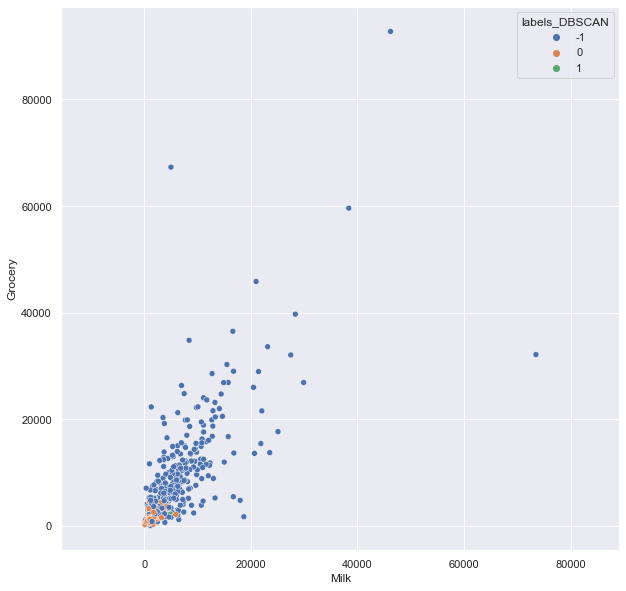

In [223]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=customers, x="Milk", y="Grocery", 
    hue="labels_DBSCAN"
)
plt.axis("equal")

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

/Users/derinkivaner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


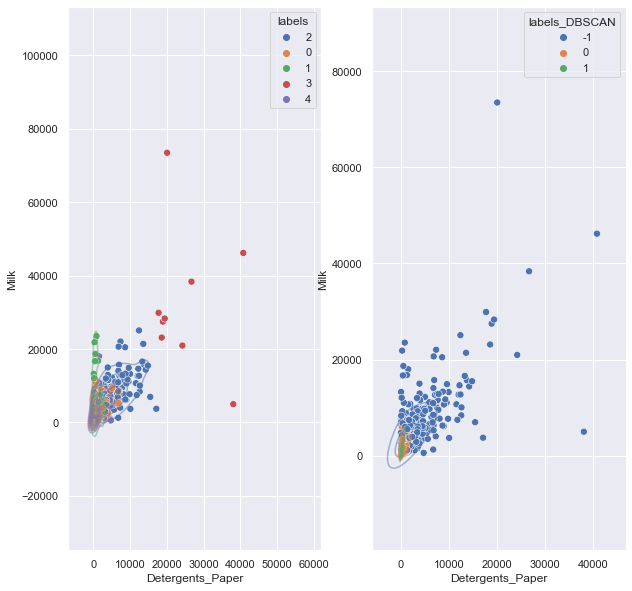

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [224]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize = (10, 10))

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, x="Detergents_Paper", y="Milk", 
    hue="labels",alpha=.5,
    ax = ax[0]
)
sns.scatterplot(
    data=customers, x="Detergents_Paper", y="Milk",
    hue="labels",s=50,
    ax = ax[0]
)
ax[0].axis("equal")

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Detergents_Paper", y="Milk", 
    hue="labels_DBSCAN",alpha=.5,
    ax = ax[1]
)
sns.scatterplot(
    data=customers, 
    x="Detergents_Paper", y="Milk", 
    hue="labels_DBSCAN", 
    ax = ax[1],s=50,
)
ax[1].axis("equal");

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

/Users/derinkivaner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


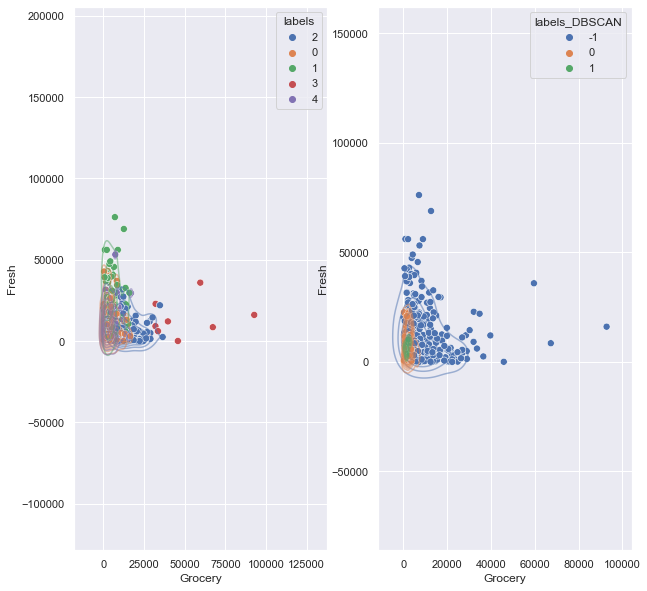

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [225]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize = (10, 10))

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, x="Grocery", y="Fresh", 
    hue="labels",alpha=.5,
    ax = ax[0]
)
sns.scatterplot(
    data=customers, x="Grocery", y="Fresh",
    hue="labels",s=50,
    ax = ax[0]
)
ax[0].axis("equal")

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Grocery", y="Fresh", 
    hue="labels_DBSCAN",alpha=.5,
    ax = ax[1]
)
sns.scatterplot(
    data=customers, 
    x="Grocery", y="Fresh", 
    hue="labels_DBSCAN", 
    ax = ax[1],s=50,
)
ax[1].axis("equal");


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

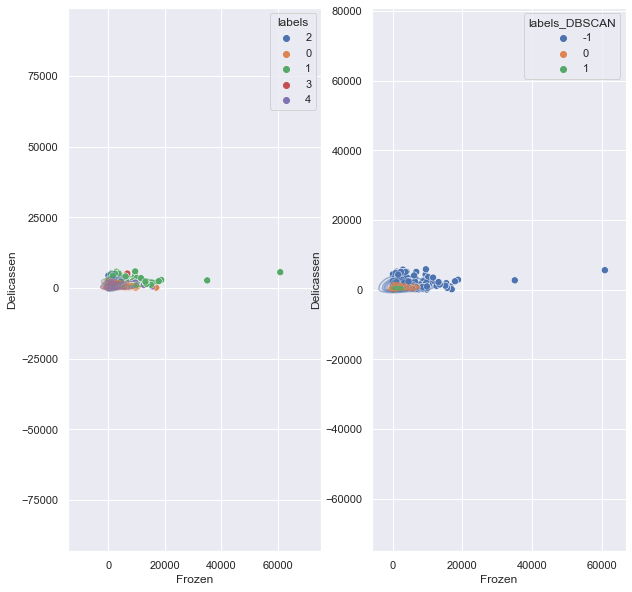

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [226]:
fig, ax = plt.subplots(1,2, figsize = (10, 10))

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, x="Frozen", y="Delicassen", 
    hue="labels",alpha=.5,
    ax = ax[0]
)
sns.scatterplot(
    data=customers, x="Frozen", y="Delicassen",
    hue="labels",s=50,
    ax = ax[0]
)
ax[0].axis("equal")

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Frozen", y="Delicassen", 
    hue="labels_DBSCAN",alpha=.5,
    ax = ax[1]
)
sns.scatterplot(
    data=customers, 
    x="Frozen", y="Delicassen", 
    hue="labels_DBSCAN", 
    ax = ax[1],s=50,
)
ax[1].axis("equal");



Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [227]:
# Your code here:
customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
0,1.006135,3.000000,9453.693252,2565.687117,3240.190184,2290.625767,748.092025,746.423313
1,1.087719,2.771930,27186.614035,5688.017544,5441.631579,8245.701754,847.473684,2713.947368
2,2.000000,2.669492,7449.194915,8913.466102,14427.830508,1307.516949,6289.983051,1346.966102
3,2.000000,2.444444,12798.111111,32536.222222,47755.333333,2529.333333,24953.444444,2551.444444
4,1.048193,1.313253,10628.759036,2880.807229,3984.265060,2938.746988,891.518072,928.337349


In [228]:
variance_dt=customers.groupby('labels').mean()
variance=(variance_dt.max()-variance_dt.min()).reset_index()
variance.sort_values(by=0,ascending=False)

,index,0
4,Grocery,44515.143149
3,Milk,29970.535106
6,Detergents_Paper,24205.352420
2,Fresh,19737.419120
5,Frozen,6938.184805
7,Delicassen,1967.524056
1,Region,1.686747
0,Channel,0.993865


In [229]:
customers.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,,,
-1,1.432177,2.44164,12907.870662,6704.470032,9621.643533,3381.621451,3667.044164,1471.977918
0,1.000000,3.00000,7829.009709,1785.805825,2275.339806,1731.436893,442.203883,624.106796
1,1.000000,1.00000,6878.100000,1689.100000,1687.900000,1403.200000,304.000000,441.900000


In [230]:
variance_dbscan=customers.groupby('labels_DBSCAN').mean()
variance_db=(variance_dbscan.max()-variance_dbscan.min()).reset_index()
variance_db.sort_values(by=0,ascending=False)

,index,0
4,Grocery,7933.743533
2,Fresh,6029.770662
3,Milk,5015.370032
6,Detergents_Paper,3363.044164
5,Frozen,1978.421451
7,Delicassen,1030.077918
1,Region,2.000000
0,Channel,0.432177


In [247]:
variance_df=pd.concat((variance,variance_db),axis=1)
variance_df.columns=['index','Kmeans','index2','DBscan']
variance_df.drop(columns='index2',inplace=True)
variance_df.set_index('index',inplace=True)
variance_df


,Kmeans,DBscan
index,,
Channel,0.993865,0.432177
Region,1.686747,2.000000
Fresh,19737.419120,6029.770662
Milk,29970.535106,5015.370032
Grocery,44515.143149,7933.743533
Frozen,6938.184805,1978.421451
Detergents_Paper,24205.352420,3363.044164
Delicassen,1967.524056,1030.077918


In [248]:
variance_df['delta']=variance_df['Kmeans']-variance_df['DBscan']

In [249]:
variance_df

,Kmeans,DBscan,delta
index,,,
Channel,0.993865,0.432177,0.561688
Region,1.686747,2.000000,-0.313253
Fresh,19737.419120,6029.770662,13707.648457
Milk,29970.535106,5015.370032,24955.165074
Grocery,44515.143149,7933.743533,36581.399616
Frozen,6938.184805,1978.421451,4959.763354
Detergents_Paper,24205.352420,3363.044164,20842.308256
Delicassen,1967.524056,1030.077918,937.446138


Which algorithm appears to perform better?


Kmeans. There is a more clear differentiation between the variables per each cluster.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [299]:
# Your code here
def kmeansforx(x):
    km_fit = KMeans(n_clusters=x)
    km_fit.fit(customers_scale)
    customers[f'labels{x}']=[str(i) for i in km_fit.labels_]
    fig, ax = plt.subplots(1,3, figsize = (20, 10))

    plt.figure(figsize=(20, 10))

    sns.scatterplot(
        data=customers, x="Detergents_Paper", y="Milk",
        hue=f"labels{x}",s=50,
        ax = ax[0]
    ).set(xlim=(-1000,20000),ylim=(-1000,20000))


    plt.figure(figsize=(20, 10))

    sns.scatterplot(
        data=customers, 
        x="Grocery", y="Fresh", 
        hue=f"labels{x}", 
        ax = ax[1],s=50,
    ).set(xlim=(-1000,20000),ylim=(-1000,20000))
    
    plt.figure(figsize=(20, 10))

    sns.scatterplot(
        data=customers, 
        x="Frozen", y="Delicassen", 
        hue=f"labels{x}", 
        ax = ax[2],s=50,
    ).set(xlim=(-1000,20000),ylim=(-1000,20000))
    ;


/var/folders/51/zl81hkbj365fyht29sw2pjsw0000gn/T/ipykernel_54828/710211629.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,3, figsize = (20, 10))


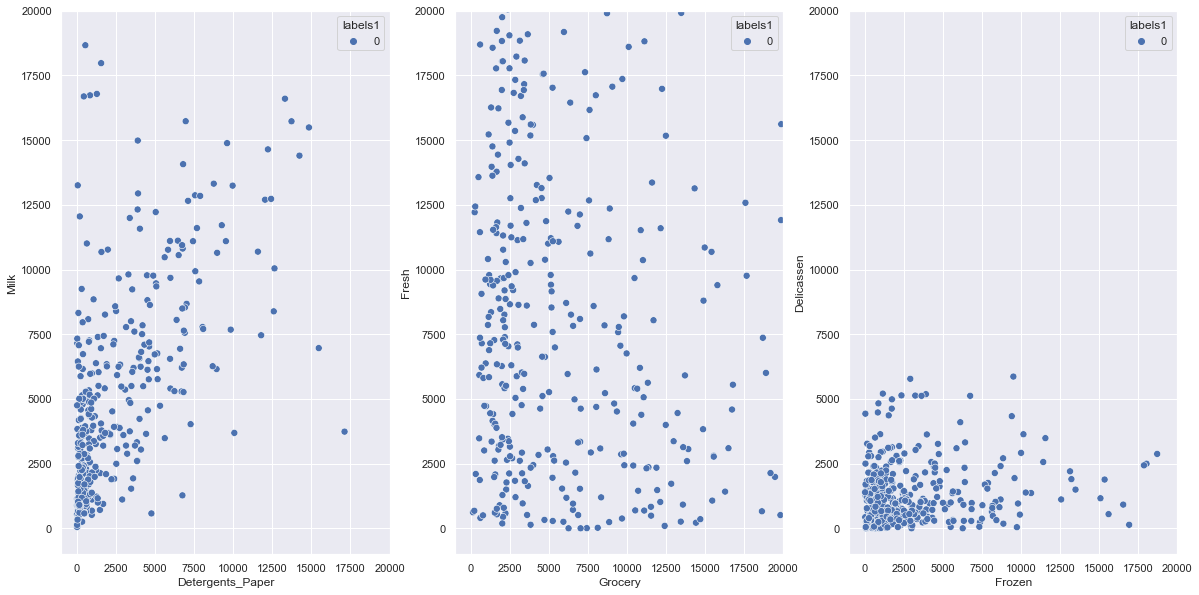

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

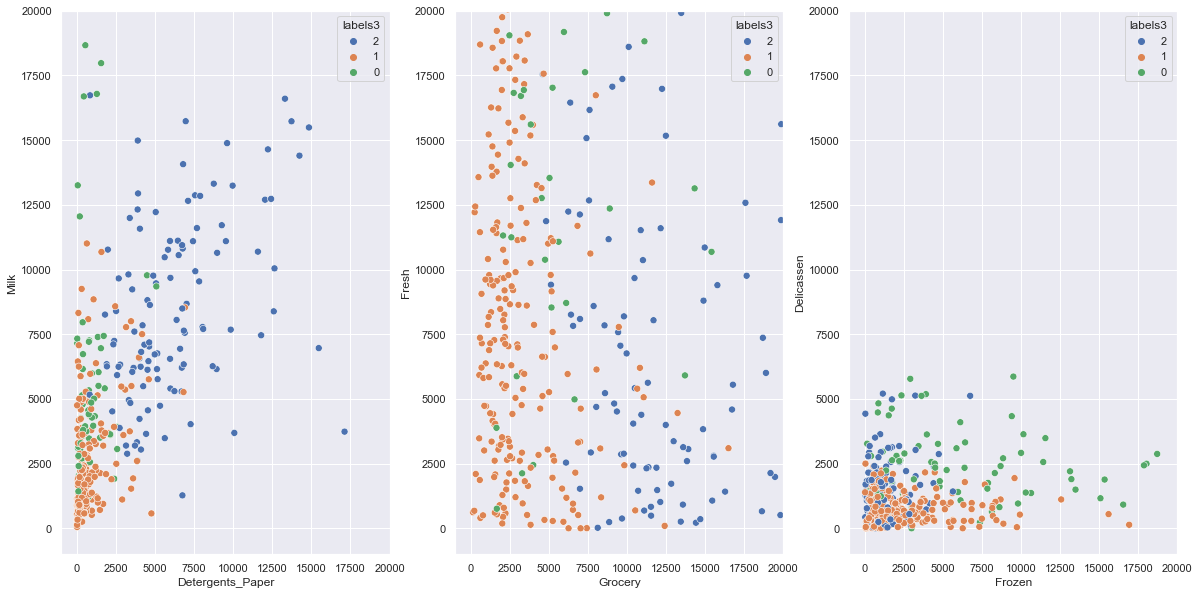

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

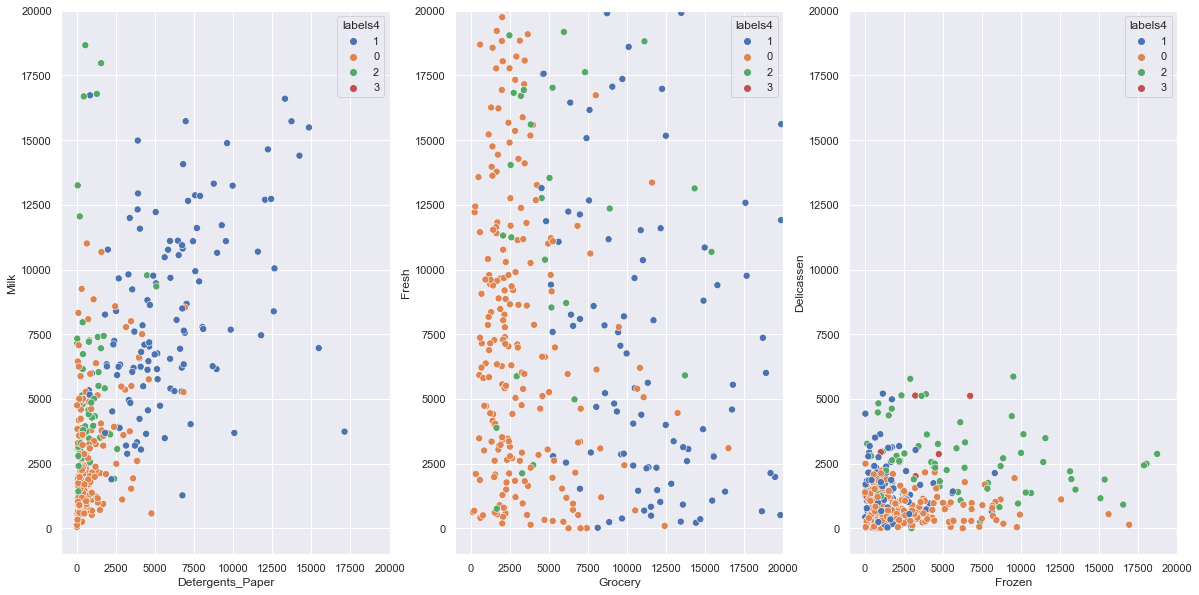

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

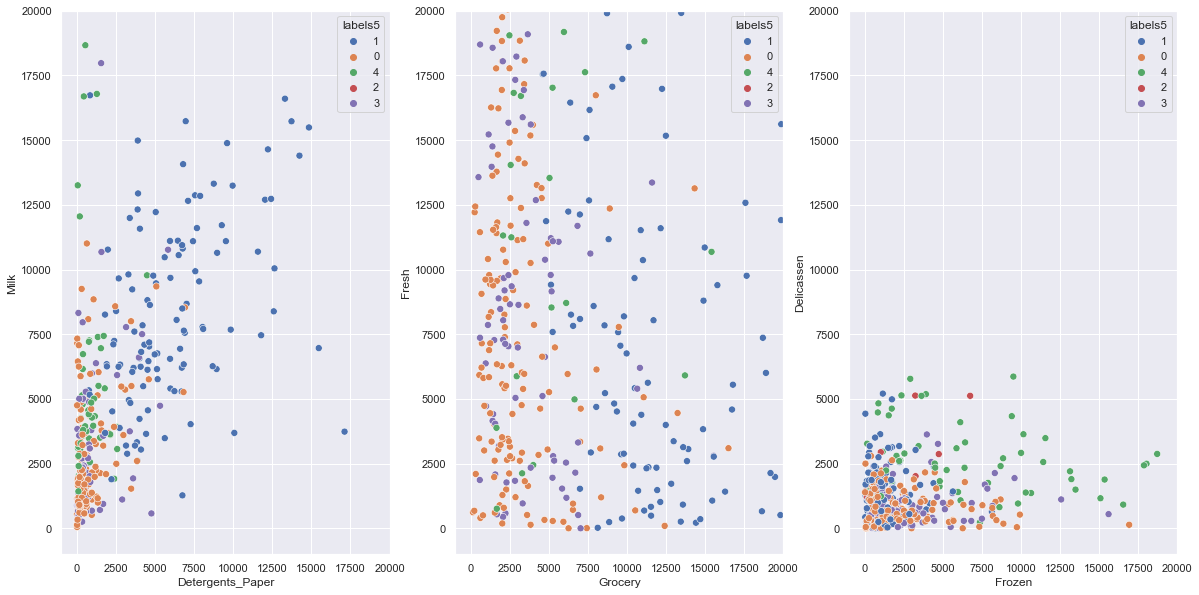

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

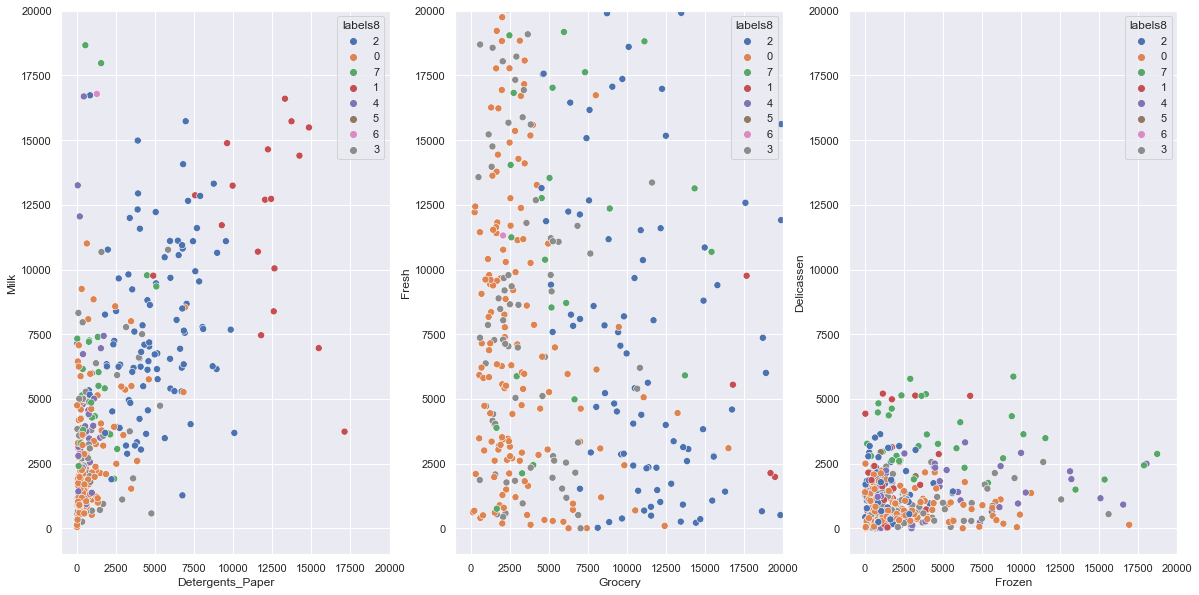

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

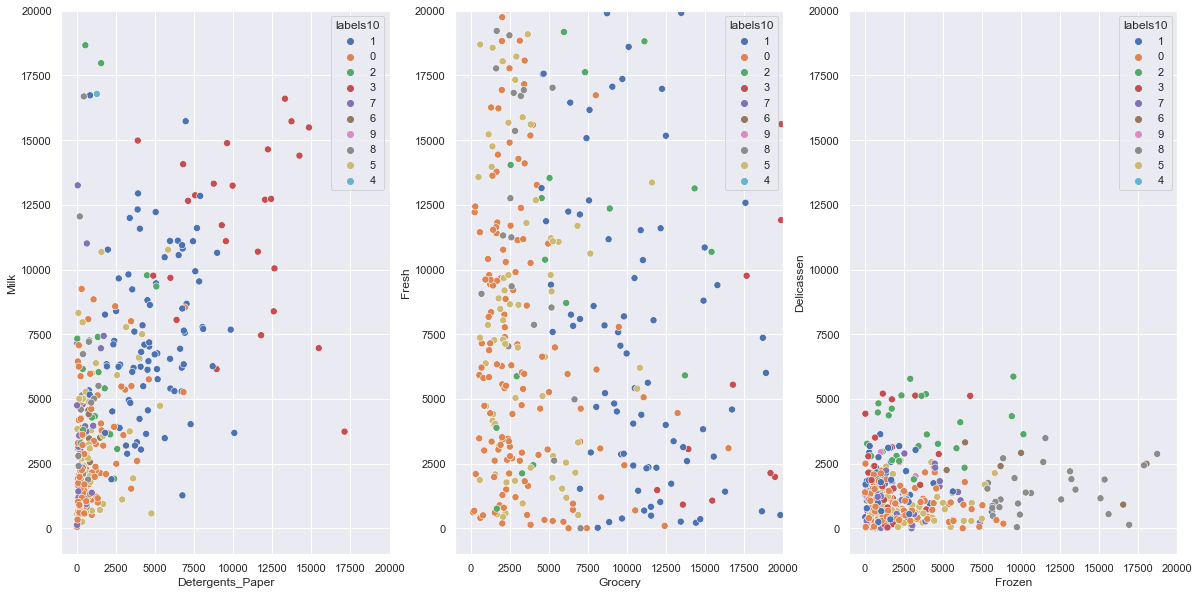

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

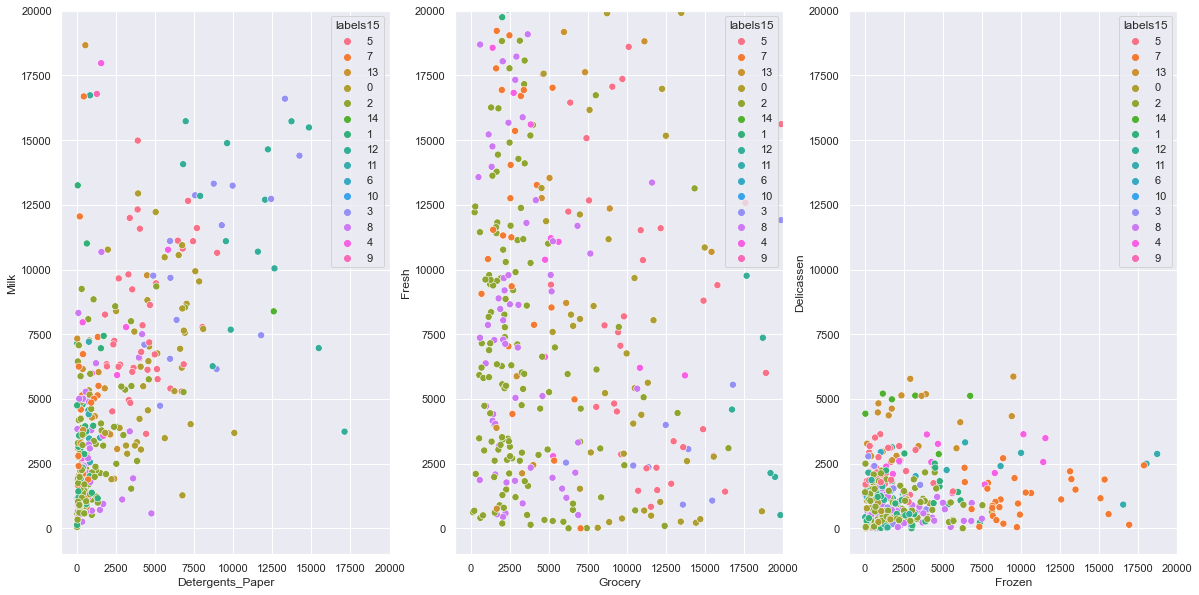

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [300]:
n_test=[1,3,4,5,8,10,15]
for i in n_test:
    kmeansforx(i)

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [301]:
# Your code here
def dbscanforx(x):
    db_fit = DBSCAN(eps=x)
    db_fit.fit(customers_scale)
    customers[f"labels_DB{x}"] = [str(i) for i in db_fit.labels_]
    fig, ax = plt.subplots(1,3, figsize = (20, 10))

    plt.figure(figsize=(20, 10))

    sns.scatterplot(
        data=customers, x="Detergents_Paper", y="Milk",
        hue=f"labels_DB{x}",s=50,
        ax = ax[0]
    ).set(xlim=(-1000,20000),ylim=(-1000,20000))


    plt.figure(figsize=(20, 10))

    sns.scatterplot(
        data=customers, 
        x="Grocery", y="Fresh", 
        hue=f"labels_DB{x}", 
        ax = ax[1],s=50,
    ).set(xlim=(-1000,20000),ylim=(-1000,20000))
    
    plt.figure(figsize=(20, 10))

    sns.scatterplot(
        data=customers, 
        x="Frozen", y="Delicassen", 
        hue=f"labels_DB{x}", 
        ax = ax[2],s=50,
    ).set(xlim=(-1000,20000),ylim=(-1000,20000))
    ;


/var/folders/51/zl81hkbj365fyht29sw2pjsw0000gn/T/ipykernel_54828/2912947677.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,3, figsize = (20, 10))


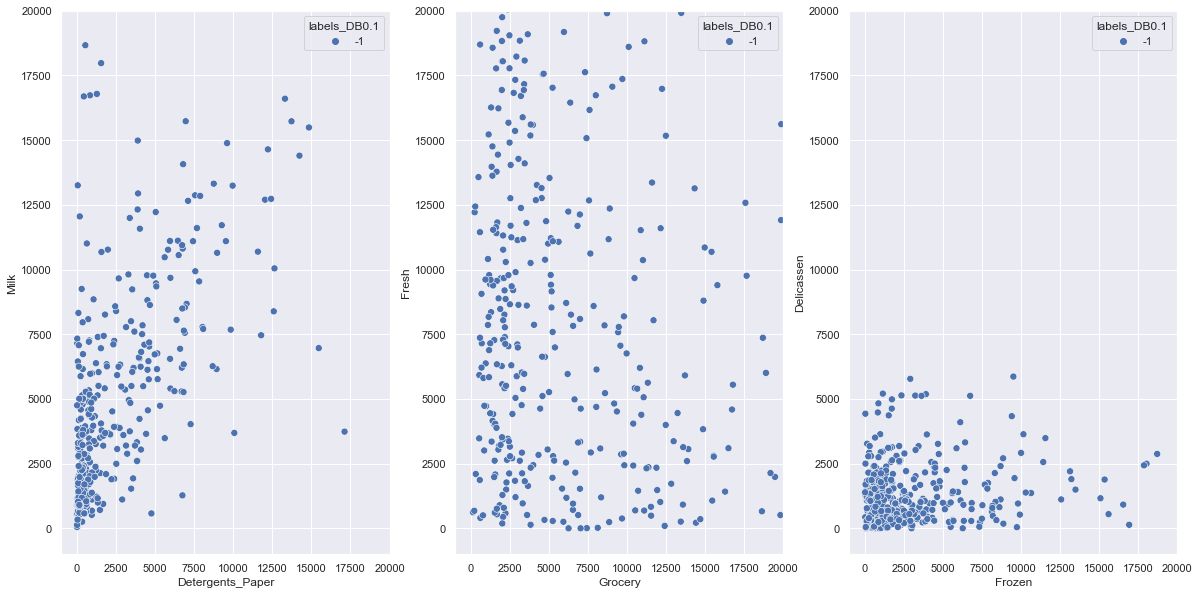

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

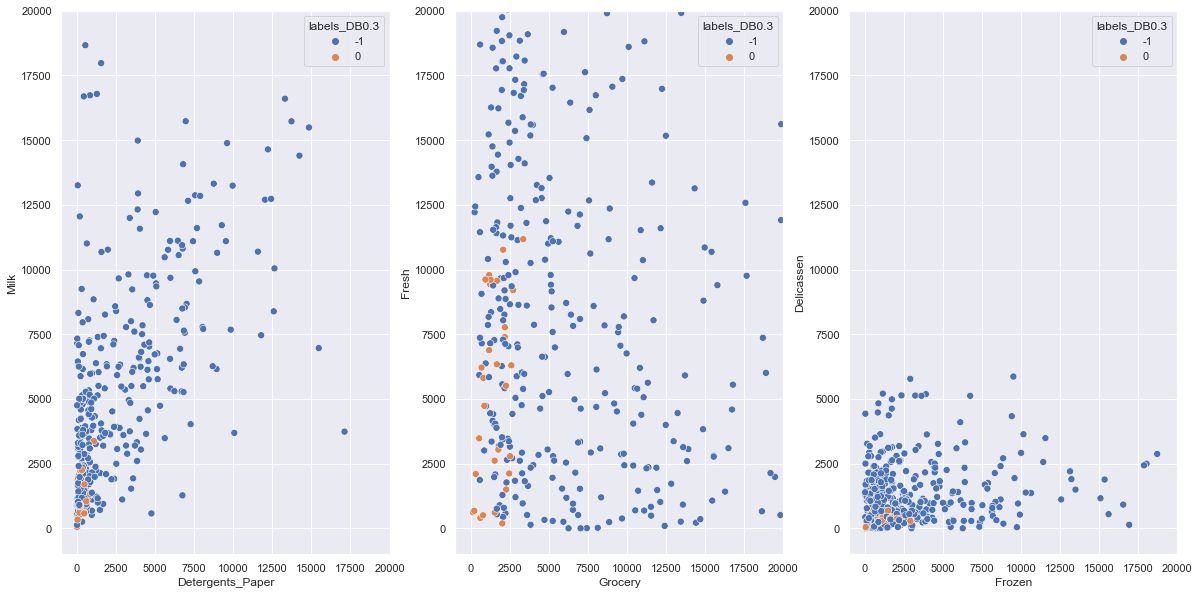

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

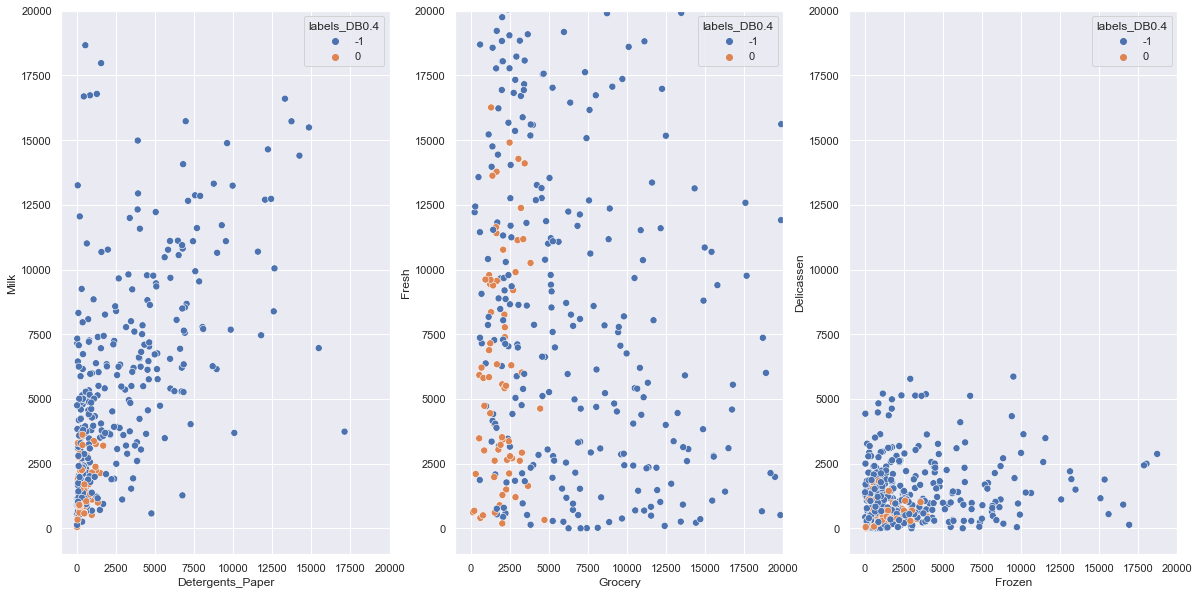

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

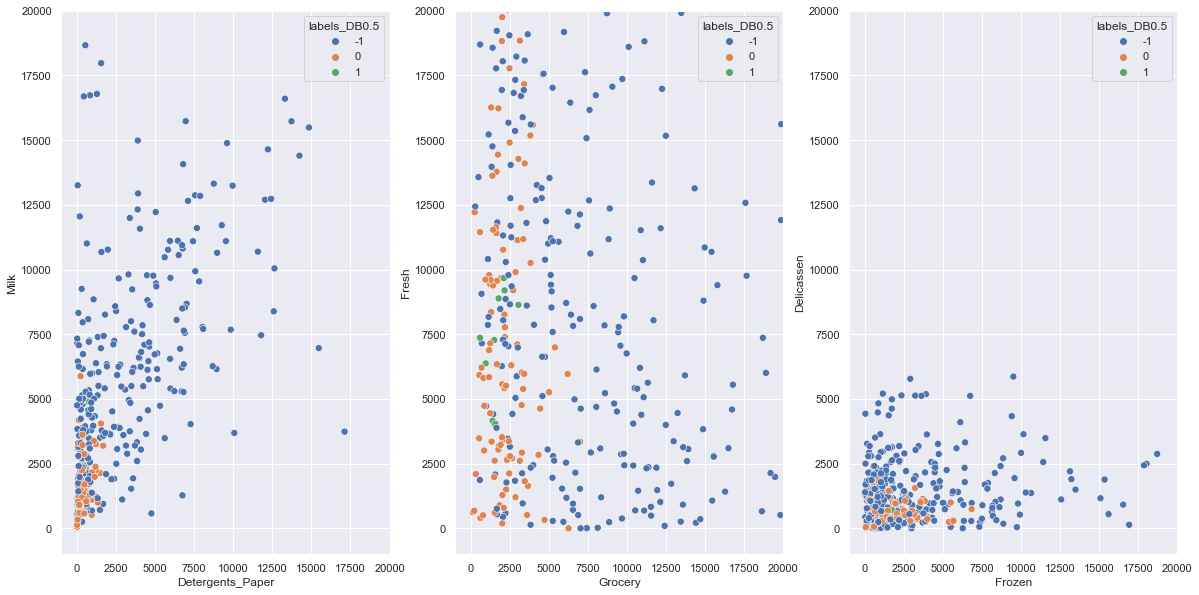

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

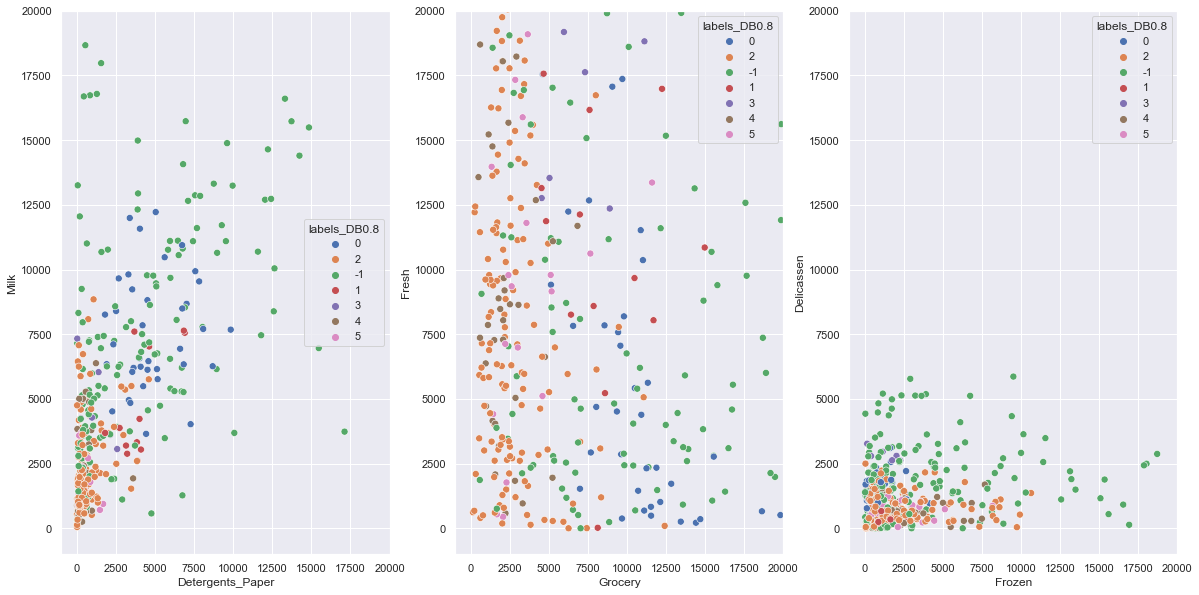

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

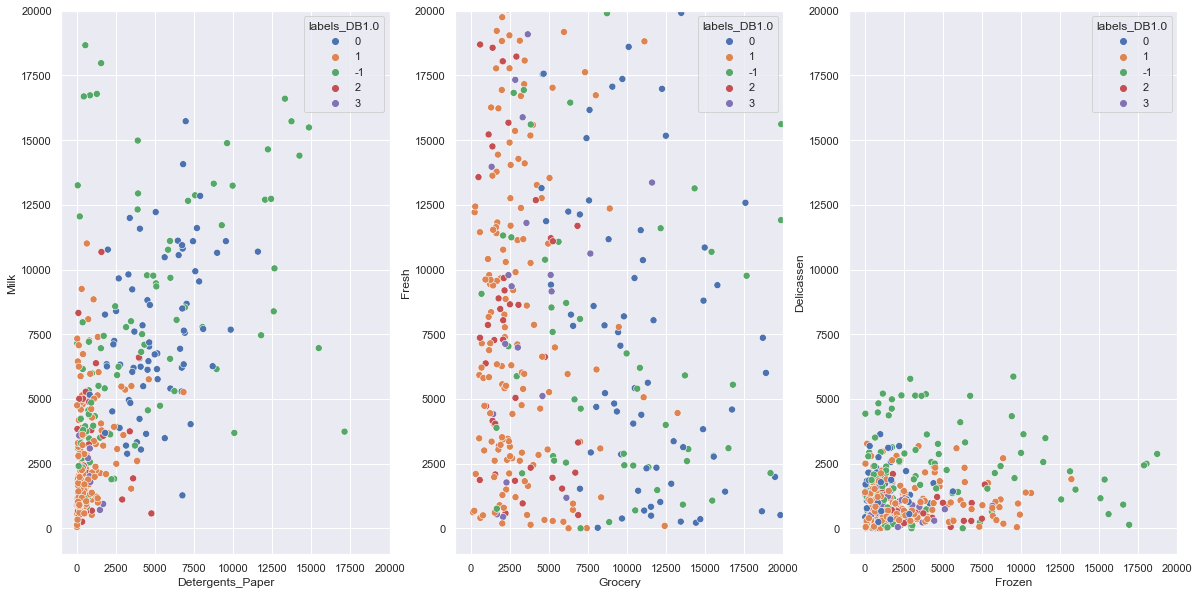

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

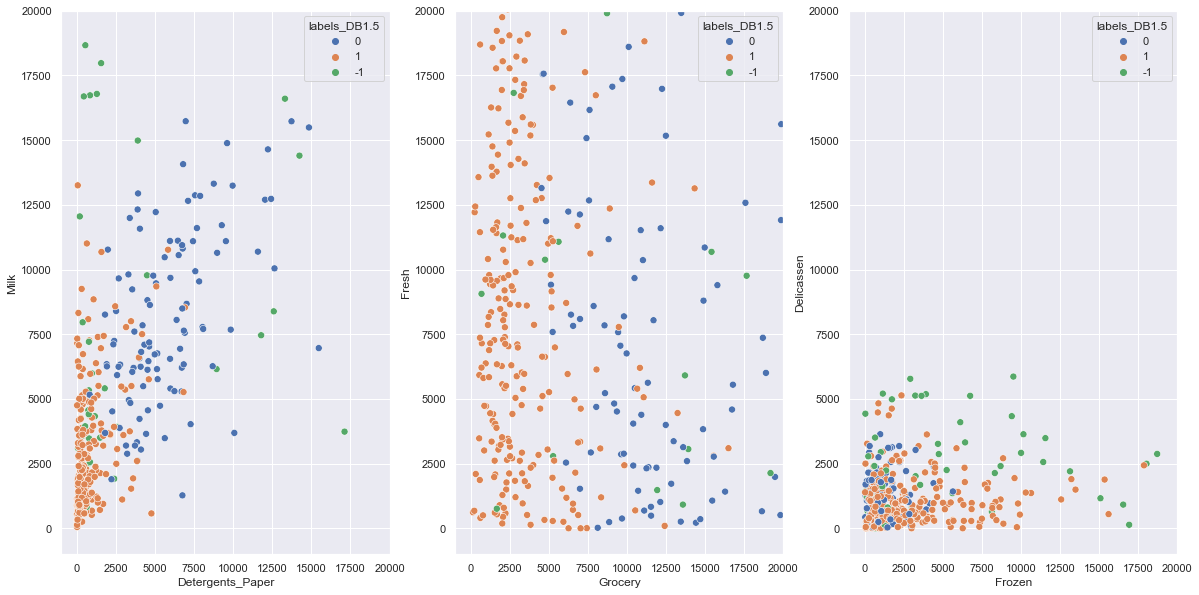

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [306]:
# Your comment here
eps_test=[.1,.3,.4,.5,.8,1.0,1.5]
for i in eps_test:
    dbscanforx(i)